In [1]:
import pandas as pd

In [2]:
weather = pd.read_excel(
    '/Users/youngyuan/Venv_Projects/Misc/weather.xlsx', index_col='date', parse_dates=True)
weather.head()

,maxTemp,minTemp,weather,wind
date,,,,
2020-01-01,10℃,2℃,阴转多云,东风 2级
2020-01-02,12℃,8℃,多云,东风 2级
2020-01-03,12℃,9℃,多云转雨,东北风 2级
2020-01-04,12℃,9℃,多云,东北风 2级
2020-01-05,14℃,10℃,多云,东风 3级


In [3]:
weather.describe()

,maxTemp,minTemp,weather,wind
count,361,361,361,361
unique,37,34,20,24
top,21℃,24℃,晴,北风 3级
freq,20,23,94,37


In [4]:
weather['maxTemp'] = weather.maxTemp.str.split('℃', expand=True)[0].astype('int64')
weather['minTemp'] = weather.minTemp.str.split('℃', expand=True)[0].astype('int64')
weather

,maxTemp,minTemp,weather,wind
date,,,,
2020-01-01,10,2,阴转多云,东风 2级
2020-01-02,12,8,多云,东风 2级
2020-01-03,12,9,多云转雨,东北风 2级
2020-01-04,12,9,多云,东北风 2级
2020-01-05,14,10,多云,东风 3级
...,...,...,...,...
2020-12-27,13,9,霾,西北风 2级
2020-12-28,15,9,多云,东风 2级
2020-12-29,16,-4,阴,北风 3级


In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 2020-01-01 to 2020-12-31
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   maxTemp  361 non-null    int64 
 1   minTemp  361 non-null    int64 
 2   weather  361 non-null    object
 3   wind     361 non-null    object
dtypes: int64(2), object(2)
memory usage: 14.1+ KB


In [6]:
temp_av = weather.resample('M').mean()
temp_av.head()

,maxTemp,minTemp
date,,
2020-01-31,10.096774,5.645161
2020-02-29,12.896552,6.241379
2020-03-31,16.300000,9.266667
2020-04-30,20.566667,11.866667
2020-05-31,26.833333,19.466667


<AxesSubplot:title={'center':'Temp_max_min'}, xlabel='DateTime', ylabel='centigrade'>

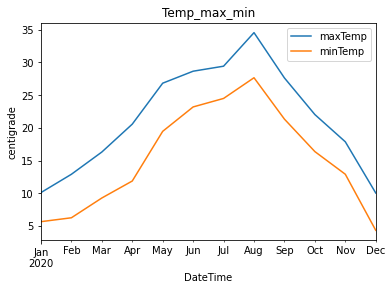

In [7]:
temp_av.plot(title='Temp_max_min', xlabel='DateTime', ylabel='centigrade')

<AxesSubplot:title={'center':'Temp_max_min'}, ylabel='date'>

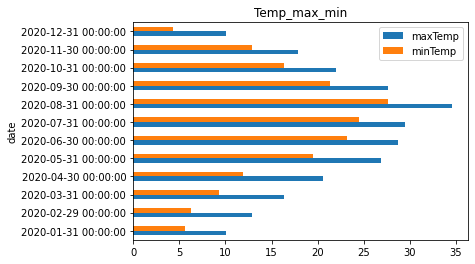

In [8]:
temp_av.plot(kind='barh', title='Temp_max_min')

In [9]:
group = weather.groupby(by='weather').count()
group

,maxTemp,minTemp,wind
weather,,,
中雨到大雨,1,1,1
中雨转雨,4,4,4
多云,86,86,86
多云转多云,1,1,1
多云转晴,3,3,3
多云转阴,5,5,5
多云转雨,9,9,9
大雨转雨,2,2,2
小雨,15,15,15


In [10]:
weather.cov()

,maxTemp,minTemp
maxTemp,73.445168,66.003540
minTemp,66.003540,65.737889


In [11]:
weather.corr()

,maxTemp,minTemp
maxTemp,1.0000,0.9499
minTemp,0.9499,1.0000


In [12]:
weather['weather'].unique()

array(['阴转多云', '多云', '多云转雨', '阴', '小雨到中雨', '霾', '阴转雨', '多云转晴', '暴雨转雨',
       '大雨转雨', '晴转多云', '晴', '中雨转雨', '小雨转雨', '雪', '多云转阴', '中雨到大雨', '晴转雨',
       '多云转多云', '小雨'], dtype=object)